In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/selected_M_best6.csv")
df = df.drop_duplicates()
print(df.head())

   Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction   Age  \
0          2.0    138.0      0.0  33.6                     0.127  47.0   
1          0.0     84.0    125.0  38.2                     0.233  23.0   
2          0.0    145.0      0.0  44.2                     0.630  31.0   
3          0.0    135.0    250.0  42.3                     0.365  24.0   
4          1.0    139.0    480.0  40.7                     0.536  21.0   

   Results  
0        1  
1        0  
2        1  
3        1  
4        0  


In [3]:
df.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Results
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,746.000000
mean,3.752688,120.892473,79.534946,32.229704,0.472355,33.142473,0.332440
std,3.335541,31.943115,111.745897,8.206319,0.326181,11.751286,0.471404
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
df_features = list(df.columns)
print(df_features)

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Results']


In [5]:
print((df[df_features]==0).sum())
print((df[df_features]=="NaN").sum())

Pregnancies                 112
Glucose                       5
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Results                     498
dtype: int64
Pregnancies                 0
Glucose                     0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Results                     0
dtype: int64


In [6]:
#print((df[X.columns]).isNull().sum())
print(df[df_features].isnull().sum())
print(df.shape)
df = df.dropna(axis = 0)
print(df.shape)
#print(X)

Pregnancies                 2
Glucose                     2
Insulin                     2
BMI                         2
DiabetesPedigreeFunction    2
Age                         2
Results                     0
dtype: int64
(746, 7)
(744, 7)


In [7]:

# temp = df[df['BloodPressure']!=0.000000]
# df['BloodPressure'] = df['BloodPressure'].replace( 0.000000 , temp.mean()[0])

# temp = df[df['Glucose']!=0.000000]
# df['Glucose'] = df['Glucose'].replace( 0.000000 , temp.mean()[0])

# temp = df[df['BMI']!=0.000000]
# df['BMI'] = df['BMI'].replace( 0.000000 , temp.mean()[0])


print((df[df_features]==0).sum())


Pregnancies                 112
Glucose                       5
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Results                     497
dtype: int64


In [8]:
print(df.max())

Pregnancies                  17.00
Glucose                     199.00
Insulin                     744.00
BMI                          80.60
DiabetesPedigreeFunction      2.42
Age                          81.00
Results                       1.00
dtype: float64


In [9]:
print(df.min())

Pregnancies                  0.000
Glucose                      0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Results                      0.000
dtype: float64


In [10]:
print(df.max() - df.min())

Pregnancies                  17.000
Glucose                     199.000
Insulin                     744.000
BMI                          80.600
DiabetesPedigreeFunction      2.342
Age                          60.000
Results                       1.000
dtype: float64


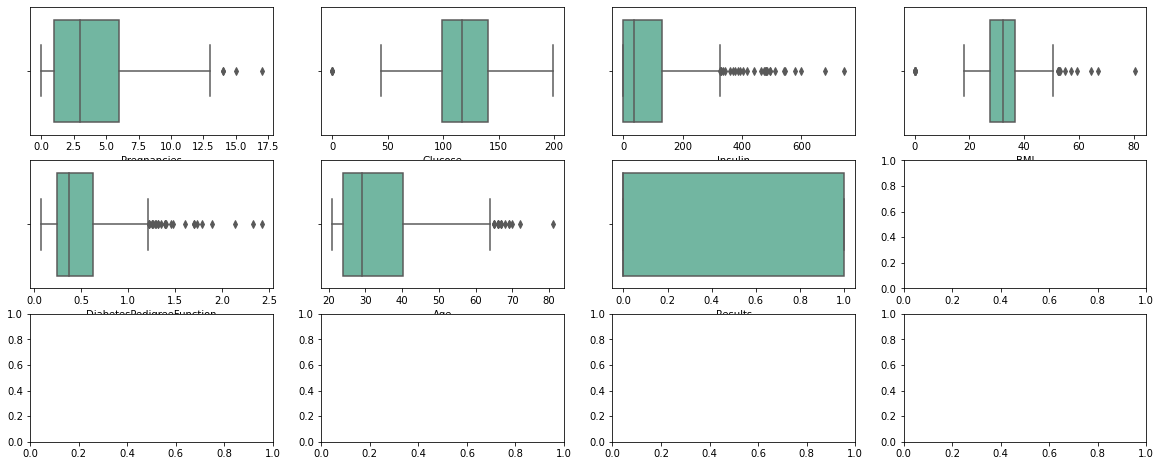

In [11]:
fig, axes = plt.subplots(3,4, figsize=(20,8))
x_,y_ = 0,0
for i, column in enumerate(df.columns[:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7: 
        x_ = 2
        y_ = 0
    else:
        y_ += 1

In [12]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_01 = pd.DataFrame(data=dat, columns=cols)  
print(df_01.head())

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Results'],
      dtype='object')
   Pregnancies   Glucose   Insulin       BMI  DiabetesPedigreeFunction  \
0     0.117647  0.693467  0.000000  0.416873                  0.020922   
1     0.000000  0.422111  0.168011  0.473945                  0.066183   
2     0.000000  0.728643  0.000000  0.548387                  0.235696   
3     0.000000  0.678392  0.336022  0.524814                  0.122545   
4     0.058824  0.698492  0.645161  0.504963                  0.195559   

        Age  Results  
0  0.433333      1.0  
1  0.033333      0.0  
2  0.166667      1.0  
3  0.050000      1.0  
4  0.000000      0.0  


In [13]:
print(df_01.max() - df_01.min())

Pregnancies                 1.0
Glucose                     1.0
Insulin                     1.0
BMI                         1.0
DiabetesPedigreeFunction    1.0
Age                         1.0
Results                     1.0
dtype: float64


In [14]:
x = df_01.drop(["Results"], axis =1);
y = df_01["Results"]
print(y.value_counts())

0.0    497
1.0    247
Name: Results, dtype: int64


(array([497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 247.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

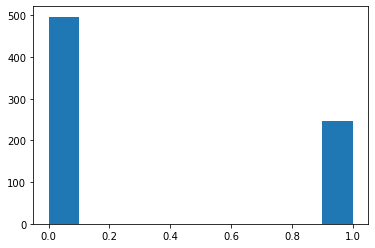

In [15]:
plt.hist(y)

0.0    274
1.0    247
Name: Results, dtype: int64


(array([274.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 247.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

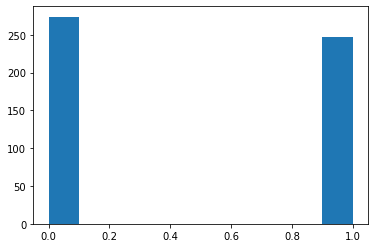

In [16]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.9, random_state=0)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0.0    274
1.0    274
Name: Results, dtype: int64


(array([274.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 274.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

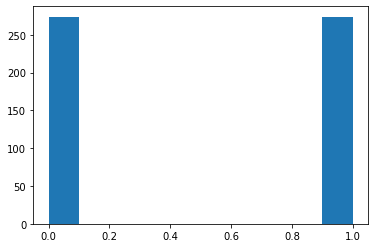

In [17]:
smt = SMOTE(random_state=0)
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [18]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  62.591
Standed deviation :  1.277
CV value :  3
Parameters :  {}
Accuracy :  62.399
Standed deviation :  3.822
CV value :  4
Parameters :  {}
Accuracy :  59.854
Standed deviation :  4.193
CV value :  5
Parameters :  {}
Accuracy :  62.954
Standed deviation :  3.003


In [19]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 0}
Accuracy :  63.321
Standed deviation :  1.277
CV value :  3
Parameters :  {'random_state': 10}
Accuracy :  66.595
Standed deviation :  4.403
CV value :  4
Parameters :  {'random_state': 0}
Accuracy :  63.869
Standed deviation :  4.272
CV value :  5
Parameters :  {'random_state': 4}
Accuracy :  65.114
Standed deviation :  7.866


In [20]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 17}
Accuracy :  65.328
Standed deviation :  2.920
CV value :  3
Parameters :  {'n_neighbors': 13}
Accuracy :  64.957
Standed deviation :  4.311
CV value :  4
Parameters :  {'n_neighbors': 17}
Accuracy :  64.416
Standed deviation :  4.540
CV value :  5
Parameters :  {'n_neighbors': 17}
Accuracy :  65.301
Standed deviation :  7.730


In [21]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  66.971
Standed deviation :  6.387
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  66.773
Standed deviation :  6.432
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  66.971
Standed deviation :  5.686
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  66.756
Standed deviation :  8.242


In [22]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  47.993
Standed deviation :  0.182
CV value :  3
Parameters :  {}
Accuracy :  49.274
Standed deviation :  1.901
CV value :  4
Parameters :  {}
Accuracy :  45.803
Standed deviation :  0.948
CV value :  5
Parameters :  {}
Accuracy :  46.714
Standed deviation :  3.854


In [23]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'rbf'}
Accuracy :  66.423
Standed deviation :  4.380
CV value :  3
Parameters :  {'kernel': 'poly'}
Accuracy :  65.863
Standed deviation :  5.476
CV value :  4
Parameters :  {'kernel': 'rbf'}
Accuracy :  65.876
Standed deviation :  5.273
CV value :  5
Parameters :  {'kernel': 'linear'}
Accuracy :  66.387
Standed deviation :  8.571


In [24]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 200, 'max_features': 4, 'n_estimators': 100}
Accuracy :  65.693
Standed deviation :  4.380
CV value :  3
Parameters :  {'max_depth': 200, 'max_features': 2, 'n_estimators': 300}
Accuracy :  66.955
Standed deviation :  6.632
CV value :  4
Parameters :  {'max_depth': 100, 'max_features': 2, 'n_estimators': 200}
Accuracy :  68.431
Standed deviation :  5.398
CV value :  5
Parameters :  {'max_depth': 200, 'max_features': 3, 'n_estimators': 100}
Accuracy :  68.212
Standed deviation :  9.668
